# <img style="float: left; padding-right: 0.7cm; width: 3.0cm" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/179px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2022-1**<br>
**Profesora:** Paula Aguirre <br>
**Integrantes:** Rodolfo Cruz, Nicolas San Martin, Benjamin Santander, Daniela Victorero <br>

----

 <h1><center>Proyecto: Análisis sobre la insuficiencia del desarrollo educacional con relación al rendimiento académico y otras variables.</center></h1>

## Contexto y motivación:

Deseamos saber si existe una relación entre la situación socioeconómica del individuo
y su capital cognitivo, para tomar medidas que permitan mejorar y equiparar el desarrollo
cognitivo del individuo, así como su acceso considerando el contexto de reformas
educacionales y pandemia. En primer lugar, se define capital cognitivo como “la suma de los saberes adquiridos a
consecuencia del capital cultural de origen más las oportunidades educacionales formales”
(Rosas, 2013, pág. 55).
En segundo lugar, según Pierre Bourdieu, se define capital cultural como “al conjunto
de bienes culturales disponibles, transmitidos de generación en generación, los que explican
las diferencias de los resultados escolares y en la ubicación relativa en la pirámide social.”
(Rosas, 2013, pág. 15). Por lo tanto, creemos que sería interesante compararar el rendimiento escolar de los estudiantes en funcion de ciertos indicadores socioeconomicos tales como:

- Indicador de calidad educacional.
- Indicados de nivel socioeconómico.




## Preguntas objetivo: 

Las preguntas anteriores eran:
1. ¿Es la educación una inversión al largo plazo?
2. ¿Existe una relación entre el nivel socioeconómico del estudiante y capital cognitivo?
3. ¿Influye la ubicación en el rendimiento académico?
4. ¿Cuáles son las regiones con mayor rendimiento académico?
5. ¿Es acaso la inversión al estudiante un factor que determine el éxito académico?

A lo largo del proyecto, se ha decidido enfocar la pregunta a que si existe una relacion entre el nivel socioeconomico del estudiante y su capital congnitivo, debido a la cantidad de informacion presente respecto al tema y tambien considerando las conclusiones obtenidas de la tarea 3 en cuando a la correlacion existente entre variables para un mejor desempeño.


## Datos: 
describa los datos utilizados y su origen, y documente los procedimientos de recolección, preparación y transformación de datos.

## Análisis exploratorio de datos: 
describa el proceso de exploración de sus datos, incluyendo visualizaciones, análisis gráficos, análisis estadísticos, etc. Explique los resultados y conclusiones preliminares obtenidas, y cómo estos influyen o motivan el método de modelamiento elegido. Justifique todas las decisiones adoptadas.



## Análisis de datos: 
describa y documente los métodos computacionales y estadísticos aplicados al modelamiento de sus datos. Justifique las elecciones y decisiones adoptadas (ej: selección de variables y parámetros, configuración de algoritmos, normalizaciones, validaciones, etc.), y evalúe sus resultados en base a métricas apropiadas al modelo elaborado (Ej. error cuadrático, intervalo de confiabilidad, precisión, recall, F1, matriz de confusión, etc.)

## Resumen de los resultados: 
explique narrativa y visualmente sus resultados, cómo estos responden a la pregunta original, y las posibles limitaciones o sesgos de sus datos o análisis.

----

## Desarrollo

Como grupo pensamos que podria ser util enfocar el estudio del rendimiento estudiantil para la RM, asi luego extrapolar las mismas ideas a un panorama general de todas las regiones en Chile. Por lo tanto, comenzaremos analizando la distribucion de los establecimientos educacionales en santiago de acuerdo a indicadores socioeconomicos/sociodemograficos.

In [8]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
import matplotlib.pyplot as plt
import matplotlib as mlp
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
import geopandas as gpd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = gpd.read_file("C2017-2012_RM_pob_socioec.gpkg")
data

,densidad,pct_adultoMayor,pct_inmigrante,pct_originario,pct_nna,pct_hombres,pct_mujeres,pct_adultos,EDUC,Hacinpunt,NSE,geometry
0,0.054692,4.581152,35.994764,9.293194,19.633508,47.513089,52.486911,75.785340,12.296209,120,615.703002,"POLYGON ((344096.410 6300127.298, 344107.550 6..."
1,0.048181,7.957154,15.455241,6.350421,20.887529,46.595256,53.404744,71.155318,12.212580,120,565.386146,"POLYGON ((344409.506 6299902.537, 344265.614 6..."
2,0.010379,6.250000,29.687500,0.000000,21.875000,50.000000,50.000000,71.875000,10.868421,120,538.684211,"POLYGON ((343989.345 6300001.313, 343988.286 6..."
3,0.003985,0.000000,46.153846,11.538462,11.538462,48.076923,51.923077,69.230769,11.500000,120,533.823529,"POLYGON ((343776.213 6299893.815, 343773.421 6..."
4,0.008718,13.432836,37.313433,0.000000,0.000000,52.238806,47.761194,73.134328,9.692308,120,459.769231,"POLYGON ((343998.500 6299870.782, 343948.879 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...
39896,0.010371,20.261438,7.189542,9.150327,11.111111,51.633987,48.366013,68.627451,9.700000,200,575.708333,"MULTIPOLYGON (((345130.403 6292602.454, 345133..."
39897,0.016502,20.652174,0.000000,13.043478,0.000000,58.695652,41.304348,68.478261,8.826531,120,431.309524,"POLYGON ((343516.840 6292797.778, 343464.863 6..."
39898,0.019252,7.142857,35.714286,16.326531,13.265306,53.061224,46.938776,79.591837,0.000000,0,0.000000,"MULTIPOLYGON (((343621.691 6292917.766, 343571..."
39899,0.046861,10.389610,0.000000,0.000000,32.467532,50.649351,49.350649,57.142857,7.914634,120,399.996791,"POLYGON ((343209.239 6292809.688, 343215.843 6..."


Text(0.5, 1.0, 'Distribucion de población en Santiago según CENSO 2012-2018')

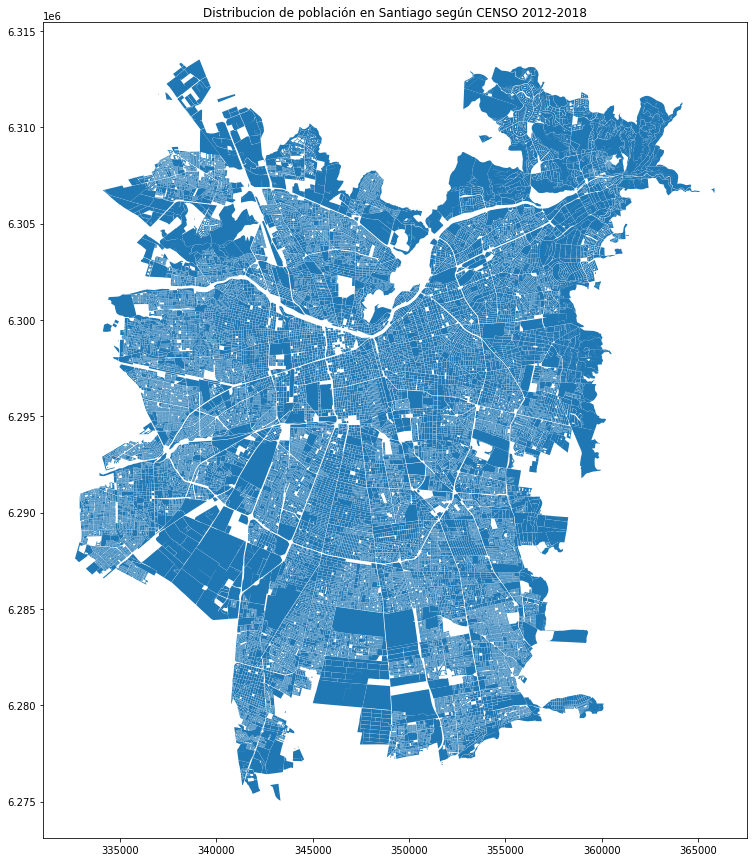

In [3]:
fig, ax = plt.subplots(figsize = (20, 15))
data.plot(ax = ax)
ax.set_title("Distribucion de población en Santiago según CENSO 2012-2018")

In [4]:
geometry = data["geometry"]
data.drop("geometry", axis = 1, inplace=True)

In [5]:
scaler = StandardScaler()
data_sc = scaler.fit_transform(data)
data_sc

array([[ 2.62755543, -0.85066647,  3.4884121 , ...,  0.92240589,
        -0.19439716,  0.77193235],
       [ 2.13041708, -0.45537733,  1.20574721, ...,  0.88918019,
        -0.19439716,  0.41565012],
       [-0.75603497, -0.65526446,  2.78745275, ...,  0.35514714,
        -0.19439716,  0.22657977],
       ...,
       [-0.07849973, -0.55072165,  3.45724103, ..., -3.96286723,
        -3.62881875, -3.58772092],
       [ 2.02956951, -0.17056597, -0.51187473, ..., -0.81838986,
        -0.19439716, -0.75543439],
       [-0.72039556, -0.41133123, -0.51187473, ..., -0.30353302,
        -0.19439716, -0.66410696]])

In [6]:
inertia=[]
kmax=12
for i in range(1,kmax):

    kmeans = KMeans(n_clusters=i,n_init=10)
    kncl= kmeans.fit(data_sc)

    print(i,kncl.inertia_)
    inertia.append(kncl.inertia_)

1 438911.0000000007
2 367271.5935785037
3 327679.6607315247
4 299238.22023960366
5 276220.1792438178
6 257999.26236733625
7 238542.1739431475
8 225958.9870171664
9 215383.595193001
10 205055.36371274767
11 197396.90748459025


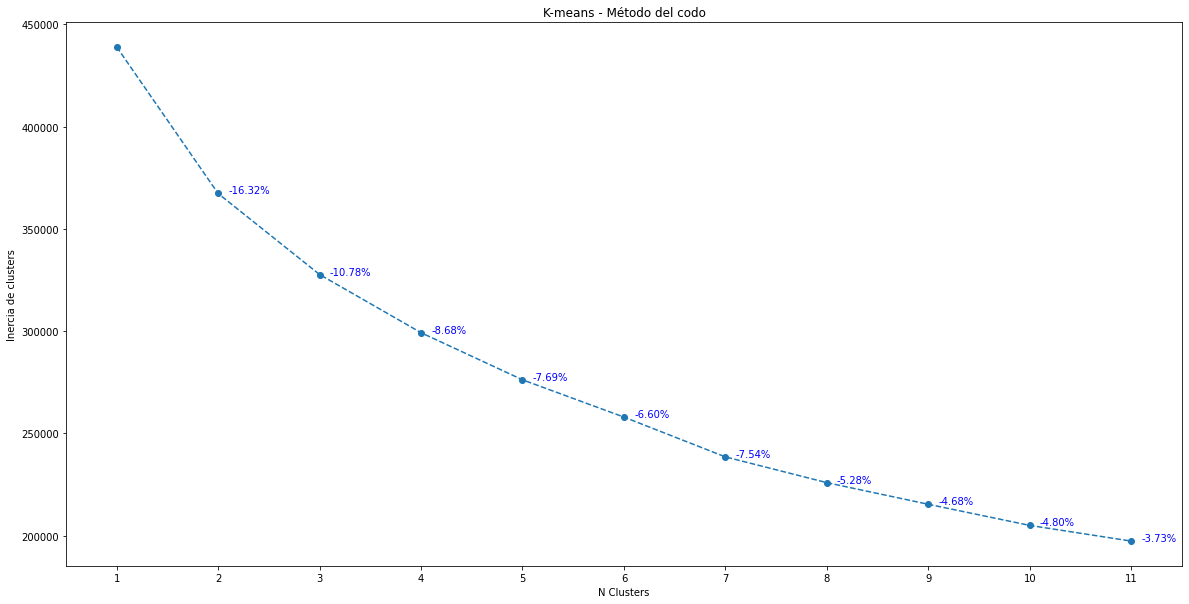

In [7]:
f, ax = plt.subplots(1,1, figsize=(20,10))

ax.plot(range(1,kmax),inertia,marker='o',ls='--')
ax.set_xlabel('N Clusters')
ax.set_ylabel('Inercia de clusters')
ax.set_title('K-means - Método del codo')

for i in range(1,len(inertia)):
    delta=(-inertia[i-1]+inertia[i])/inertia[i-1]*100
    ax.text(i+1.1,inertia[i],'%.2f'%delta+'%',color='b')
ax.set_xticks(range(1,kmax))

plt.show()

In [8]:
k=5

# Inicializamos la instancia  KMeans 
kmeans = KMeans(n_clusters=k,random_state=0)


# Correr el algoritmo sobre el conjunto de variable normalizadas
kcls = kmeans.fit(data_sc)

In [9]:
data['kcls_labels'] = kcls.labels_
centers = kcls.cluster_centers_
centers_i = scaler.inverse_transform(centers)
centers_i

array([[2.47980548e-02, 8.13923400e+00, 3.36976087e+01, 8.44597613e+00,
        1.26331725e+01, 5.17736317e+01, 4.80205011e+01, 7.48466238e+01,
        1.07414002e+01, 1.22038085e+02, 5.19866272e+02],
       [1.21837493e-02, 1.56362092e+01, 5.79985594e+00, 4.26196833e+00,
        1.04596386e+01, 4.60767073e+01, 5.34525198e+01, 6.59858004e+01,
        1.31735032e+01, 1.99576304e+02, 7.35133886e+02],
       [2.70965741e-02, 8.84284742e+00, 2.59656171e+00, 1.40403079e+01,
        1.97750545e+01, 4.93164724e+01, 5.06319102e+01, 6.89888812e+01,
        8.93262355e+00, 1.19341592e+02, 4.45714973e+02],
       [1.48066352e-02, 1.50150566e+01, 2.52907426e+00, 7.01670890e+00,
        9.36311468e+00, 4.74344904e+01, 5.23775135e+01, 6.79808604e+01,
        1.07359058e+01, 1.19995822e+02, 5.35209896e+02],
       [1.30038388e-02, 6.89540659e+00, 6.72370690e+00, 7.30792396e+00,
        1.16558771e+01, 4.59804289e+01, 4.57333187e+01, 6.34613901e+01,
        2.43470646e-02, 3.38983051e-01, 1.17815073e+

In [10]:
data["geometry"] = geometry

C:\Users\Rodolfo\AppData\Local\Temp\ipykernel_13172\1681604517.py:1: FutureWarning: Setting geometries to a GeoDataFrame without a geometry column will currently preserve the CRS, if present. This is deprecated, and in the future the CRS will be lost in this case. You can use set_crs(..) on the result to set the CRS manually.
  data["geometry"] = geometry


<AxesSubplot:>

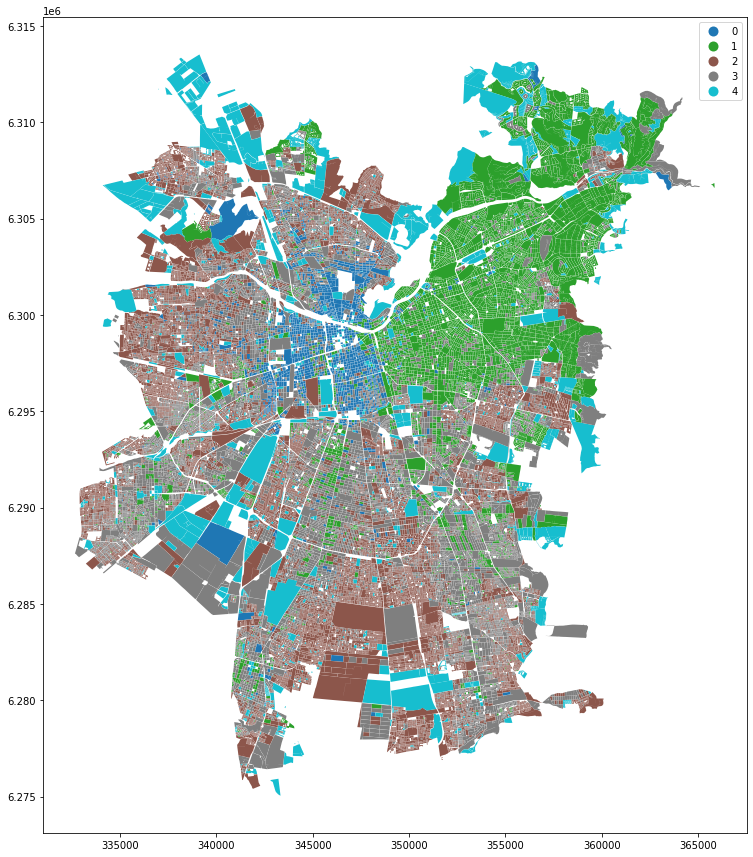

In [11]:
data.plot(figsize=(20,15),column = "kcls_labels", categorical = True, legend = True)

In [12]:
values = data.groupby(by = "kcls_labels").mean().sort_values(by="NSE")
data.groupby(by = "kcls_labels").mean().sort_values(by="NSE")

,densidad,pct_adultoMayor,pct_inmigrante,pct_originario,pct_nna,pct_hombres,pct_mujeres,pct_adultos,EDUC,Hacinpunt,NSE
kcls_labels,,,,,,,,,,,
4,0.013004,6.895407,6.723707,7.307924,11.655877,45.980429,45.733319,63.461390,0.024347,0.338983,1.178151
2,0.027116,8.853538,2.595868,14.061052,19.782820,49.318737,50.629518,68.973571,8.928894,119.339964,445.512391
0,0.024806,8.138857,33.704164,8.450325,12.633033,51.777037,48.016990,74.844884,10.741884,122.039135,519.862657
3,0.014819,14.982260,2.531217,7.011654,9.385106,47.436700,52.375891,68.003759,10.735249,119.995835,535.201962
1,0.012185,15.639277,5.800994,4.262805,10.459729,46.077900,53.451235,65.983443,13.173167,199.591917,735.130184


In [14]:
colegios = pd.read_csv("Directorio_Oficial_EE_2021.csv", sep=";")
colegios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16498 entries, 0 to 16497
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGNO            16498 non-null  int64 
 1   RBD             16498 non-null  int64 
 2   DGV_RBD         16498 non-null  int64 
 3   NOM_RBD         16468 non-null  object
 4   MRUN            16498 non-null  object
 5   RUT_SOSTENEDOR  16498 non-null  object
 6   P_JURIDICA      16498 non-null  int64 
 7   COD_REG_RBD     16498 non-null  int64 
 8   NOM_REG_RBD_A   16498 non-null  object
 9   COD_PRO_RBD     16498 non-null  int64 
 10  COD_COM_RBD     16498 non-null  int64 
 11  NOM_COM_RBD     16498 non-null  object
 12  COD_DEPROV_RBD  16498 non-null  int64 
 13  NOM_DEPROV_RBD  16498 non-null  object
 14  COD_DEPE        16498 non-null  int64 
 15  COD_DEPE2       16498 non-null  int64 
 16  RURAL_RBD       16498 non-null  int64 
 17  LATITUD         16498 non-null  object
 18  LONGIT

In [15]:
colegios[colegios["NOM_COM_RBD"] == "PUENTE ALTO"]

,AGNO,RBD,DGV_RBD,NOM_RBD,MRUN,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,...,ENS_08,ENS_09,ENS_10,ENS_11,MATRICULA,ESTADO_ESTAB,ORI_RELIGIOSA,ORI_OTRO_GLOSA,PAGO_MATRICULA,PAGO_MENSUAL
7524,2021,9280,0,C.DIAGNOSTICO,,,9,13,RM,132,...,0,0,0,0,0,3,9,,SIN INFORMACION,SIN INFORMACION
8329,2021,10449,3,ESCUELA CAMINO DE LUZ,,70856400,1,13,RM,132,...,0,0,0,0,1,1,1,,GRATUITO,GRATUITO
8330,2021,10450,7,ESCUELA CONSOLIDADA,,70856400,1,13,RM,132,...,0,0,0,0,1,1,1,,GRATUITO,GRATUITO
8331,2021,10451,5,LICEO GENERAL PEDRO LAGOS,,70856400,1,13,RM,132,...,0,0,0,0,0,3,9,,SIN INFORMACION,SIN INFORMACION
8332,2021,10452,3,LICEO PUENTE ALTO,,70856400,1,13,RM,132,...,0,0,0,0,1,1,1,,GRATUITO,GRATUITO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15654,2021,31500,1,ESC. BASICA Nº230 EL SEMBRADOR CASAS VIEJAS,,65122137,1,13,RM,132,...,0,0,0,0,1,1,1,,GRATUITO,GRATUITO
16113,2021,41152,3,CENTRO VITAMINA CONCHA Y TORO,,76407810,1,13,RM,132,...,0,0,0,0,0,1,9,,SIN INFORMACION,SIN INFORMACION
16182,2021,41300,3,JARDIN INFANTIL CORDILLERA,,76341963,1,13,RM,132,...,0,0,0,0,0,3,9,,SIN INFORMACION,SIN INFORMACION
16250,2021,41460,3,CENTRO VITAMINA PLAZA PUENTE ALTO,,76407810,1,13,RM,132,...,0,0,0,0,0,1,9,,SIN INFORMACION,SIN INFORMACION


In [16]:
colegios["LONGITUD"] = colegios["LONGITUD"].replace(" ", np.nan)
colegios["LATITUD"] = colegios["LATITUD"].replace(" ", np.nan)
colegios.dropna()
colegios["LONGITUD"] = colegios["LONGITUD"].str.replace(",",".").astype(np.float64)
colegios["LATITUD"] = colegios["LATITUD"].str.replace(",",".").astype(np.float64)
colegios = colegios[colegios["LONGITUD"] <= -50]

In [17]:
localizaciones = gpd.GeoDataFrame(colegios, geometry= gpd.points_from_xy(colegios["LONGITUD"], colegios["LATITUD"]), crs = 4326)

In [18]:
codigos = [13101, 13102, 13103, 13104, 13105, 13106, 13107, 13108, 13109, 13110, 13111, 13112, 13113, 13114, 13115, 13116, 13117, 13118, 13119, 13120, 13121, 13122, 13123, 13124, 13125, 13126, 13127, 13128, 13129, 13130, 13131, 13132, 13201, 13202, 13401, ]
localizaciones = localizaciones[localizaciones["COD_COM_RBD"].isin(codigos) == True]

In [19]:
data = data.to_crs(4326)

<AxesSubplot:>

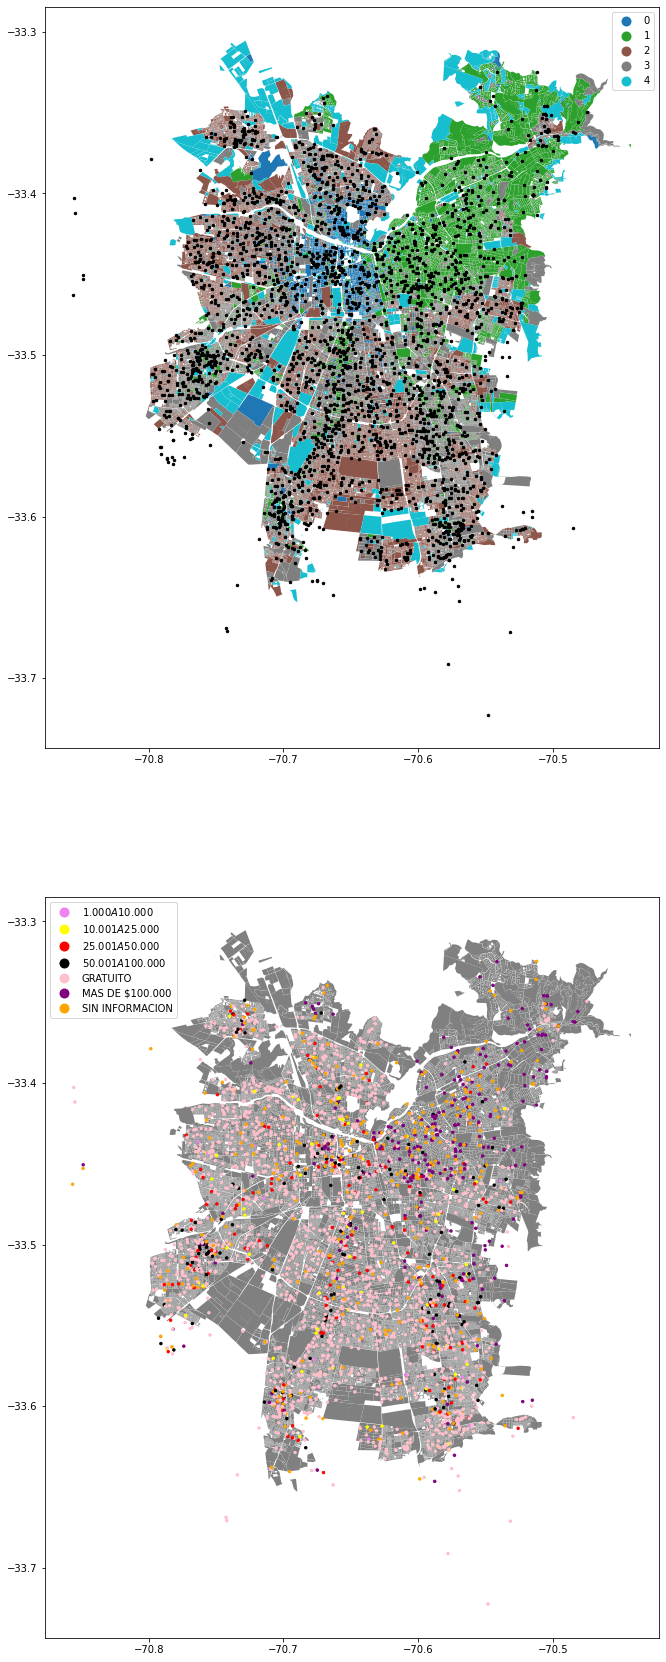

In [24]:
palette = {'GRATUITO': 'violet', '$1.000 A $10.000': 'orange', '$10.001 A $25.000' : 'yellow', '$25.001 A $50.000' : 'black', '$50.001 A $100.000' : 'red', 'MAS DE $100.000' : 'pink', "SIN INFORMACION":"purple"}
cmap = mlp.colors.ListedColormap([palette[b] for b in localizaciones['PAGO_MENSUAL'].unique()])

fig , ax= plt.subplots(2, 1, figsize=(40, 30))
plot_mapa = data.plot(ax = ax[0],column = "kcls_labels", categorical = True, legend = True)
localizaciones.plot(ax = plot_mapa, markersize=6, color = "black")
ax1 = data.plot(ax = ax[1], color = "gray")
localizaciones.plot(ax = ax1, markersize=6, cmap=cmap ,categorical = True, column="PAGO_MENSUAL", legend=True)

Con el grafico anterior podemos observar la distribucion de los establecimientos educacionales en relacion a los indicadores socioeconomicos / sociodemograficos. De esto es interesante descubrir ciertas relaciones de cantidad establecimientos v/s percepcion de calidad de vida. Aprovechando las columnas del dataset tambien podemos agregar el valor de pago mensual de cada estableciento. Tambien encontramos una relacion entre la red vial del Gran Santiago y el acceso a los establecimientos, donde alejados de las grandes carreteras, encontramos mayor cantidad de colegios gratuito a excepcion de la comuna de Providencia/Las Condes/Lo Barnechea/ Vitacura.

In [25]:
data.groupby("kcls_labels").mean()

,densidad,pct_adultoMayor,pct_inmigrante,pct_originario,pct_nna,pct_hombres,pct_mujeres,pct_adultos,EDUC,Hacinpunt,NSE
kcls_labels,,,,,,,,,,,
0,0.024806,8.138857,33.704164,8.450325,12.633033,51.777037,48.016990,74.844884,10.741884,122.039135,519.862657
1,0.012185,15.639277,5.800994,4.262805,10.459729,46.077900,53.451235,65.983443,13.173167,199.591917,735.130184
2,0.027116,8.853538,2.595868,14.061052,19.782820,49.318737,50.629518,68.973571,8.928894,119.339964,445.512391
3,0.014819,14.982260,2.531217,7.011654,9.385106,47.436700,52.375891,68.003759,10.735249,119.995835,535.201962
4,0.013004,6.895407,6.723707,7.307924,11.655877,45.980429,45.733319,63.461390,0.024347,0.338983,1.178151


Ahora investigaremos el rendimiento de los estudiantes de cada comuna de santiago en funcion de la jornada escolar que cumplen, es decir, si van por la manana (1), por la tarde (2) o jornada completa (3).

In [11]:
codigos = [13101, 13102, 13103, 13104, 13105, 13106, 13107, 13108, 13109, 13110, 13111, 13112, 13113, 13114, 13115, 13116, 13117, 13118, 13119, 13120, 13121, 13122, 13123, 13124, 13125, 13126, 13127, 13128, 13129, 13130, 13131, 13132, 13201, 13202, 13401]

FileNotFoundError: [Errno 2] No such file or directory: 'jornadas16'

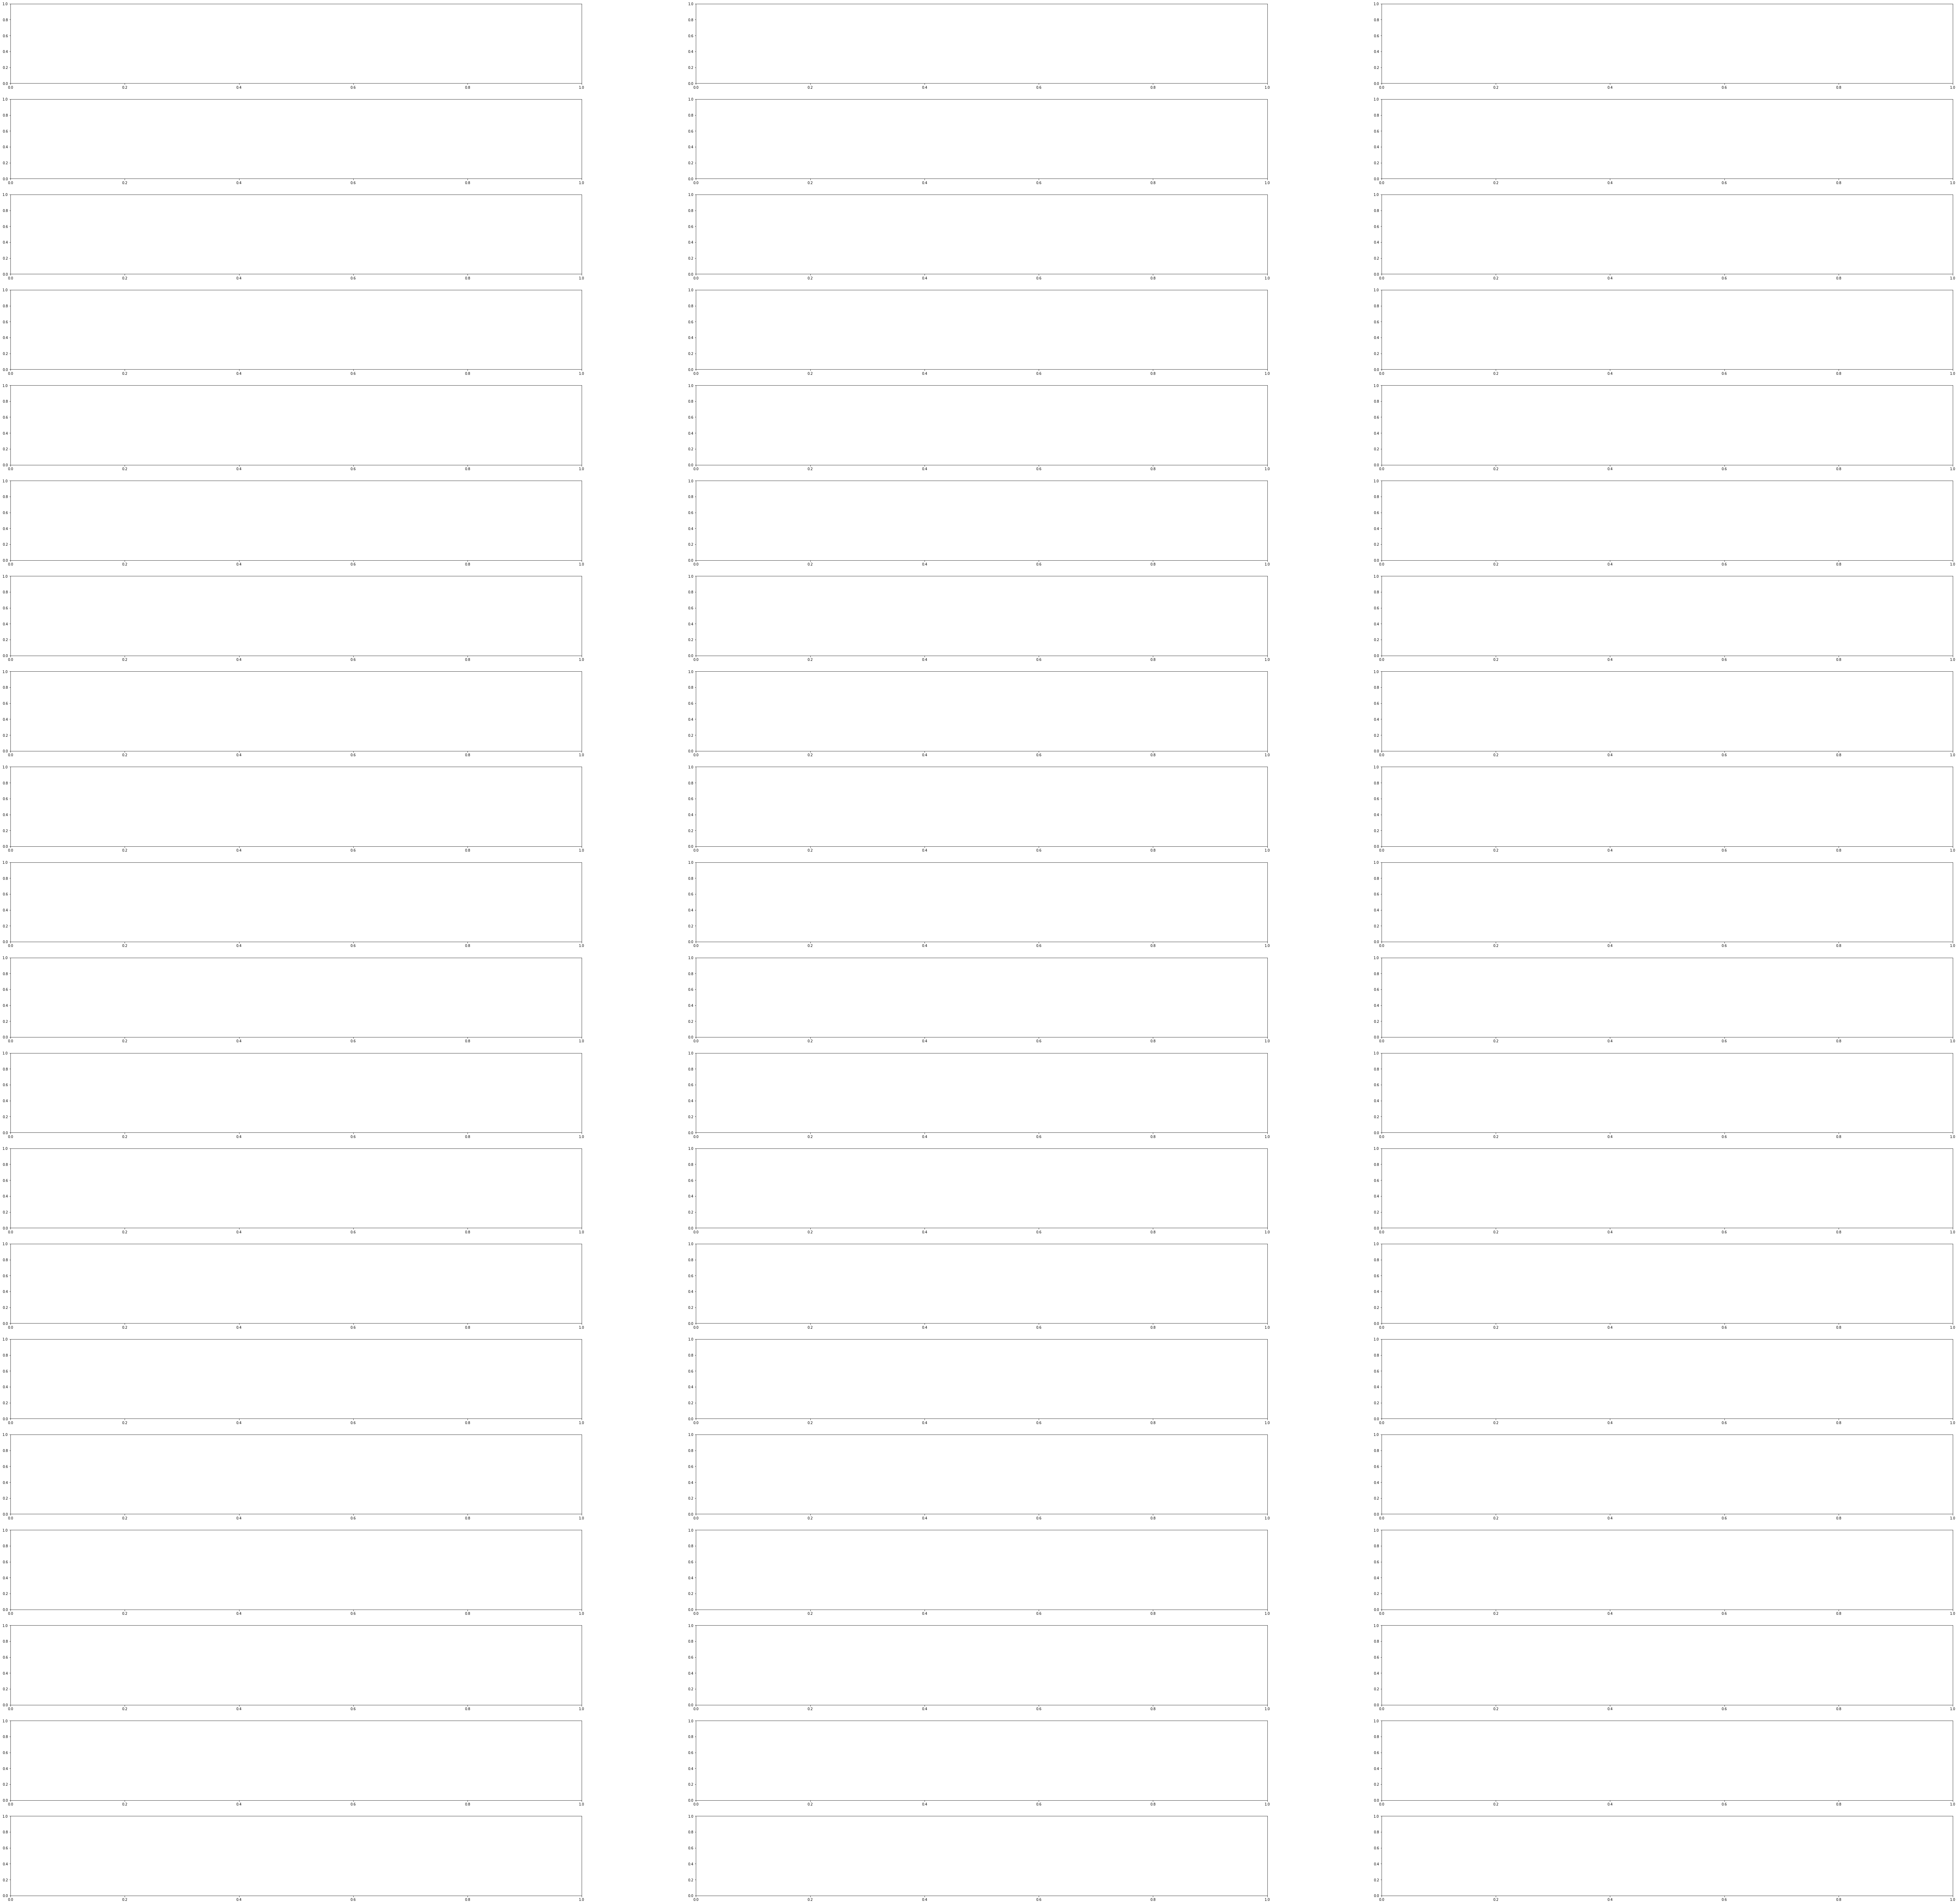

In [12]:
fig, ax = plt.subplots(20, 3, figsize=(100, 100))
ax = ax.flatten()
largo = len(codigos)
axis = 0
df_plot = pd.read_csv(f'jornadas{16}')
for k in range(largo):
    plot = df_plot[(df_plot['COD_COM_RBD'] == codigos[k])] # seleccionamos la comuna
    for j in range(1,4):
        try:
            plot_final = plot[(df_plot['COD_JOR'] == j)] # elegimos la jornada
            plot_final = plot_final.groupby('PROM_GRAL').count()
            axes = sns.scatterplot(data=plot_final, x='PROM_GRAL', y='COD_JOR',ax=ax[axis], legend=True)
            axes.set_title(f"{plot['NOM_COM_RBD'].iloc[0]} jornada: {j}", fontsize=25)
            axis += 1
        except:
            pass
plt.show()